In [68]:
import numpy as np
import pandas as pd
from datetime import datetime
#from dateutil.parser import parse
import matplotlib.pyplot as plt


https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

In [267]:
!ls

Cleaning_data.ipynb          Untitled1.ipynb
Random_Forrest_initial.ipynb housing_cleaning.csv
Untitled.ipynb               train.csv


In [268]:
X = pd.read_csv("train.csv")


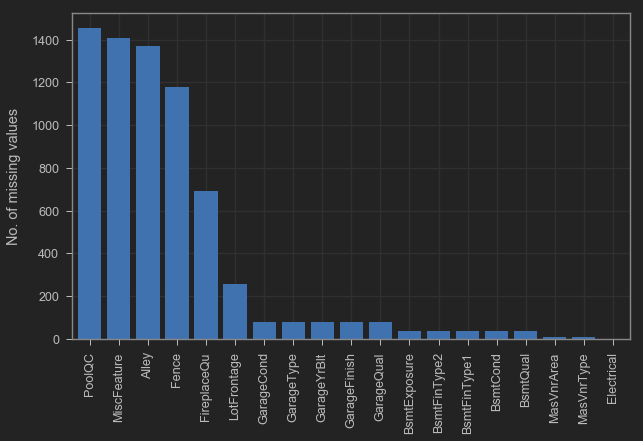

In [269]:
nans = X.isna().sum().sort_values(ascending=False)
nans = nans[nans > 0]
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.bar(nans.index, nans.values, zorder=2, color="#3f72af")
ax.set_ylabel("No. of missing values", labelpad=10)
ax.set_xlim(-0.6, len(nans) - 0.4)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [265]:
df_0 = pd.read_csv("housing_cleaning.csv")
df_0 = df_0.drop(["Unnamed: 0","Street", "Utilities","LandContour", "MasVnrType", "Condition2",\
                  "Condition1", "LandSlope", "MSZoning", "Alley", "Exterior2nd", "RoofMatl",\
                 "Exterior2nd"], axis=1)

In [245]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [262]:
df = df_0.copy()
print(df.columns)
print(df.shape)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'MasVnrArea'],
      dtype='object')
(1460, 16)


-   MSSubClass: The building class -  Categorical (N)
-   MSZoning: The general zoning classification - Categorical (N)
-   LotFrontage: Linear feet of street connected to property - Numerical
-   LotArea: Lot size in square feet - Numerical - may be highly correlated to Lot Frontage
-   Street: Type of road access - categorical bianary
-   Alley: Type of alley access -  categorical, lots of NA for no alley
-   LotShape: General shape of property - categorical (ordinal?)
-   LandContour: Flatness of the property -  categorical, flat land may be much better
-   Utilities: Type of utilities available - categorical, allpub is best probably
-   LotConfig: Lot configuration - type if lot (probably very important)
-   LandSlope: Slope of property - categorical - may be very correlated to LandContour
-   Neighborhood: Physical locations within Ames city limits - categorical
-   Condition1: Proximity to main road or railroad - These two I should be able to combine 
-   Condition2: Proximity to main road or railroad (if a second is present) 
-   BldgType: Type of dwelling
-   HouseStyle: Style of dwelling
-   OverallQual: Overall material and finish quality
-   OverallCond: Overall condition rating
-   YearBuilt: Original construction date - cannot turn only year to datetime
-   YearRemodAdd: Remodel date
-   RoofStyle: Type of roof
-   RoofMatl: Roof material
-   Exterior1st: Exterior covering on house
-   Exterior2nd: Exterior covering on house (if more than one material)
-   MasVnrType: Masonry veneer type - 
-   MasVnrArea: Masonry veneer area in square feet

In [284]:
df.dtypes

Id                int64
MSSubClass        int64
LotFrontage     float64
LotArea           int64
LotShape         object
LotConfig        object
Neighborhood     object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
Exterior1st      object
MasVnrArea      float64
dtype: object

In [264]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000


In [223]:
types_ = df.dtypes

In [291]:
numerical_df = X.select_dtypes(np.number)

In [292]:
numerical_df.to_csv("numerical_housing.csv", index=False)

In [319]:
def get_unbalanced_classes(data_frame):
    name = ""
    num_categories = 0
    majority_class_ratio = 0
    master_list = []
    for col in data_frame.columns:
        
        
        name += col
        num_categories += len(data_frame[col].value_counts())
        majority_class_ratio += data_frame[col].value_counts() 
        info_list = [name, num_categories, majority_class_ratio]
        master_list.append(info_list)
    return master_list
    
    

In [320]:
get_unbalanced_classes(X)

[['Id', 1460, 1460   NaN
  479    NaN
  481    NaN
  482    NaN
  483    NaN
  484    NaN
  485    NaN
  486    NaN
  487    NaN
  488    NaN
  489    NaN
  490    NaN
  491    NaN
  492    NaN
  493    NaN
  494    NaN
  495    NaN
  496    NaN
  497    NaN
  498    NaN
  499    NaN
  480    NaN
  478    NaN
  501    NaN
  477    NaN
  458    NaN
  459    NaN
  460    NaN
  461    NaN
  462    NaN
          ..
  996    NaN
  997    NaN
  998    NaN
  999    NaN
  1000   NaN
  1001   NaN
  1002   NaN
  983    NaN
  982    NaN
  981    NaN
  970    NaN
  962    NaN
  963    NaN
  964    NaN
  965    NaN
  966    NaN
  967    NaN
  968    NaN
  969    NaN
  971    NaN
  980    NaN
  972    NaN
  973    NaN
  974    NaN
  975    NaN
  976    NaN
  977    NaN
  978    NaN
  979    NaN
  1      NaN
  Name: Id, Length: 1460, dtype: float64], ['IdMSSubClass', 1475, 1460   NaN
  479    NaN
  481    NaN
  482    NaN
  483    NaN
  484    NaN
  485    NaN
  486    NaN
  487    NaN
  488    NaN
 

In [321]:
#X["Utilities"].value_counts()[0]/len(X)
X["Utilities"].value_counts()[0]/len(X)

0.9993150684931507

In [297]:
for col in X.columns:
    print("*"*30+" Counts categorical Vals "+"*"*30)
    print(col)
    print(X[col].value_counts())
    print("Missing Vals ")
    print(X[col].isnull().sum())
    
    

****************************** Counts categorical Vals ******************************
Id
1460    1
479     1
481     1
482     1
483     1
484     1
485     1
486     1
487     1
488     1
489     1
490     1
491     1
492     1
493     1
494     1
495     1
496     1
497     1
498     1
499     1
480     1
478     1
501     1
477     1
458     1
459     1
460     1
461     1
462     1
       ..
996     1
997     1
998     1
999     1
1000    1
1001    1
1002    1
983     1
982     1
981     1
970     1
962     1
963     1
964     1
965     1
966     1
967     1
968     1
969     1
971     1
980     1
972     1
973     1
974     1
975     1
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64
Missing Vals 
0
****************************** Counts categorical Vals ******************************
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     

0      1252
112      15
96        6
120       5
144       5
192       5
216       5
252       4
116       4
156       4
126       3
228       3
128       3
184       3
102       3
150       3
40        3
176       3
164       3
77        2
185       2
80        2
180       2
84        2
160       2
168       2
205       2
158       2
154       2
100       2
       ... 
239       1
242       1
248       1
280       1
254       1
259       1
268       1
198       1
194       1
129       1
148       1
130       1
134       1
136       1
138       1
140       1
143       1
272       1
145       1
386       1
291       1
162       1
169       1
170       1
172       1
174       1
177       1
183       1
189       1
552       1
Name: EnclosedPorch, Length: 120, dtype: int64
Missing Vals 
0
****************************** Counts categorical Vals ******************************
3SsnPorch
0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
1

list that includes the value counts of each cate 
[how many categories the feature has, percantage of most dominant variable, ]



In [275]:
X.PoolArea.value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [271]:
for col in X.columns:
    print(col, X[col].isnull().sum())

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol

In [79]:
df.loc[:,['LandContour', 'LandSlope']]
df['Land_contour_Slope'] = df['LandContour'] + df['LandSlope']

In [89]:
df['Land_contour_Slope'].unique()

array(['LvlGtl', 'BnkGtl', 'BnkMod', 'LowGtl', 'HLSGtl', 'LvlMod',
       'LowSev', 'LowMod', 'HLSMod', 'HLSSev', 'LvlSev', 'BnkSev'],
      dtype=object)

In [98]:
print(df['LandContour'].value_counts())
print("\n")
print(df['LandSlope'].value_counts())

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


In [99]:
df['Land_contour_Slope'].value_counts()

LvlGtl    1294
BnkGtl      47
HLSGtl      32
LowMod      18
LvlMod      16
HLSMod      16
BnkMod      15
LowSev       9
LowGtl       9
HLSSev       2
LvlSev       1
BnkSev       1
Name: Land_contour_Slope, dtype: int64

In [129]:
df.Exterior1st = df.Exterior1st.str.replace(' ', '').str.lower().str.strip()
df.Exterior2nd = df.Exterior2nd.str.replace(' ', '').str.lower().str.strip()


In [130]:
df.Exterior2nd.value_counts()

vinylsd    504
metalsd    214
hdboard    207
wdsdng     197
plywood    142
cmentbd     60
wdshng      38
stucco      26
brkface     25
asbshng     20
imstucc     10
brkcmn       7
stone        5
asphshn      3
cblock       1
other        1
Name: Exterior2nd, dtype: int64

vinylsdvinylsd    502
metalsdmetalsd    212
hdboardhdboard    193
wdsdngwdsdng      177
plywoodplywood     96
cemntbdcmentbd     59
brkfacebrkface     24
hdboardplywood     23
stuccostucco       20
wdshingwdshng      17
asbshngasbshng     17
brkfacewdsdng      12
wdsdngwdshng        9
wdsdngplywood       8
brkfaceplywood      6
wdshingplywood      5
plywoodbrkcmn       5
vinylsdwdshng       5
wdsdngimstucc       3
plywoodimstucc      3
metalsdhdboard      3
stuccowdshng        3
brkfacehdboard      3
hdboardimstucc      2
wdshinghdboard      2
metalsdwdsdng       2
asbshngplywood      2
wdsdnghdboard       2
vinylsdplywood      2
plywoodhdboard      2
                 ... 
wdshingwdsdng       1
asphshnasphshn      1
vinylsdhdboard      1
hdboardmetalsd      1
cemntbdwdsdng       1
vinylsdasbshng      1
imstuccimstucc      1
wdsdngstucco        1
vinylsdwdsdng       1
stonestone          1
wdsdngmetalsd       1
hdboardasphshn      1
wdsdngstone         1
metalsdasphshn      1
cblockcblo

In [188]:
def has_alley(row):
    if type(row['Alley']) == float:
        return 0
    else:
        return 1
   

In [189]:
has_alley(df.iloc[4,:])

0

In [192]:
df['has_alley'] = df.apply(lambda row: has_alley(row), axis = 1)

In [193]:
df['has_alley'].value_counts()

0    1369
1      91
Name: has_alley, dtype: int64

(array([  1.,   5.,  25.,  57.,   0., 821., 252., 205.,  72.,  22.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

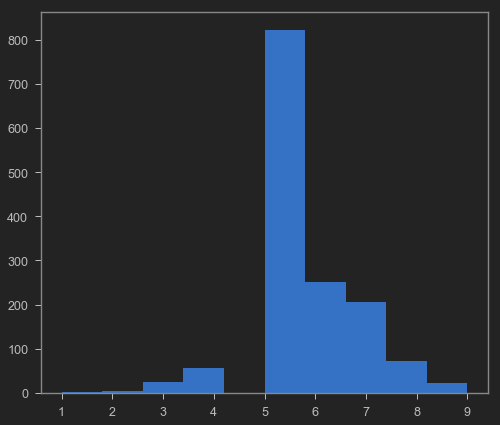

In [237]:
plt.hist(df.OverallCond)

(array([  2.,   3.,  20., 116., 397., 374., 319., 168.,  43.,  18.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

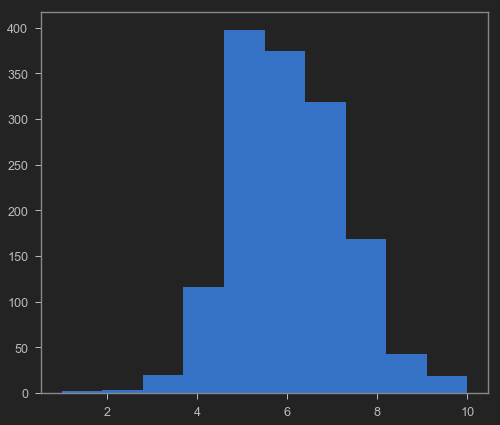

In [238]:
plt.hist(df.OverallQual)

What if we used a ratio of quality/condition
I guess what we would want is high quality and high condition, 
if we had high quality and low condition that means it had "good bones" It can be renovated
if it has high condition but low quality you may be spending the rest of your life rennovating
What if we divided 


In [240]:
df['quality/condition'] = df['OverallQual']/df['OverallCond']

(array([184., 553., 496., 201.,  24.,   1.,   0.,   0.,   0.,   1.]),
 array([0.33333333, 0.75      , 1.16666667, 1.58333333, 2.        ,
        2.41666667, 2.83333333, 3.25      , 3.66666667, 4.08333333,
        4.5       ]),
 <a list of 10 Patch objects>)

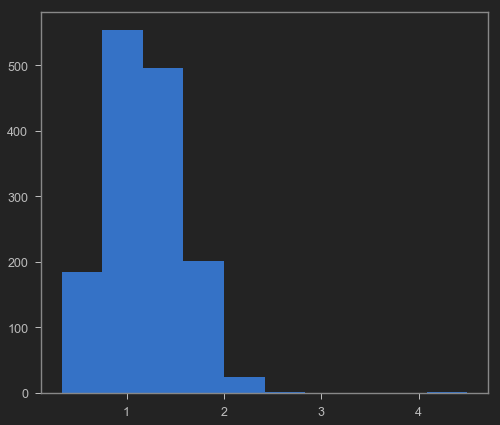

In [241]:
plt.hist(df['quality/condition'])

(array([  9.,   6.,  37., 122.,  83., 128., 261., 223., 139., 452.]),
 array([1872. , 1885.8, 1899.6, 1913.4, 1927.2, 1941. , 1954.8, 1968.6,
        1982.4, 1996.2, 2010. ]),
 <a list of 10 Patch objects>)

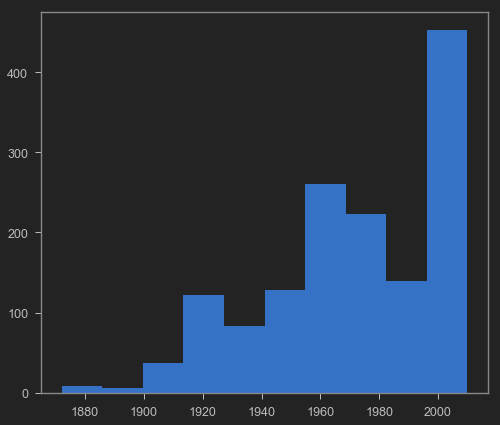

In [242]:
plt.hist(df.YearBuilt)

(array([220.,  72.,  84., 106.,  98.,  48.,  64., 150., 241., 377.]),
 array([1950., 1956., 1962., 1968., 1974., 1980., 1986., 1992., 1998.,
        2004., 2010.]),
 <a list of 10 Patch objects>)

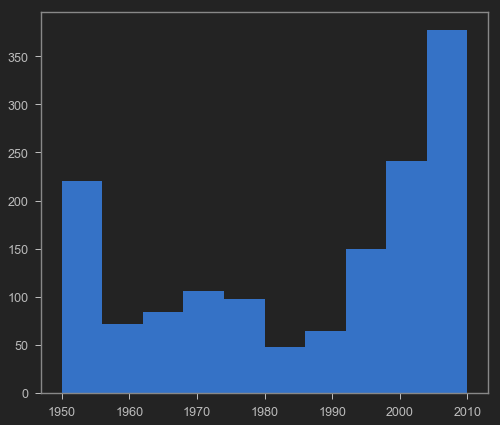

In [243]:
plt.hist(df.YearRemodAdd)

 if remodeled year is same year as built then flag as remodeled
 
 
 

In [251]:
df.YearRemodAdd = df.YearRemodAdd - df.YearBuilt 

Text(0.5, 1.0, 'Years since remodel')

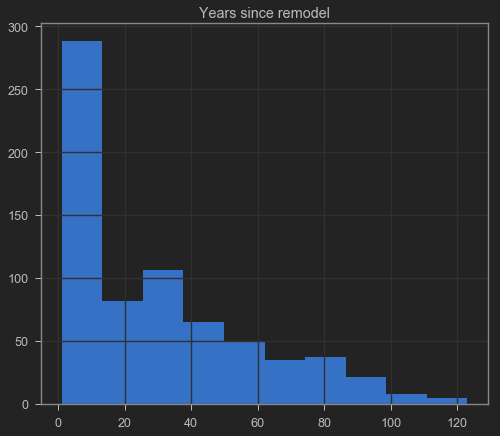

In [259]:
df.YearRemodAdd[df.YearRemodAdd != 0].hist()
plt.title('Years since remodel')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
